# Activity 02 - Pandas

Apply all the techniques we discussed in Pandas 02 (see notebook file attached in our classroom):
* Missing data
* Merge
* Group_by
* Concatenation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/ajmdz/CSELEC_2-3/master/CSELEC2/data/Melbourne_housing_FULL.csv', parse_dates=['Date'])
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [2]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,2018-02-24,6.3,3013.0,...,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


## PREPROCESSING

In [3]:
df.shape

(34857, 21)

In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

Rename columns with typos

In [6]:
new_colnames = {
    'Lattitude' : 'Latitude',
    'Longtitude' : 'Longitude'
}
df = df.rename(columns = new_colnames)
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude',
       'Longitude', 'Regionname', 'Propertycount'],
      dtype='object')

Convert certain columns to categorical

In [7]:
to_categorical = list(df.select_dtypes(['object']).columns) + ['Postcode', 'CouncilArea', 'YearBuilt']
for col in to_categorical:
  df[col] = df[col].astype('category')  
df.dtypes

Suburb                 category
Address                category
Rooms                     int64
Type                   category
Price                   float64
Method                 category
SellerG                category
Date             datetime64[ns]
Distance                float64
Postcode               category
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt              category
CouncilArea            category
Latitude                float64
Longitude               float64
Regionname             category
Propertycount           float64
dtype: object

Checking for NA values in each column

In [8]:
df.isna().sum().sort_values(ascending=False)

BuildingArea     21115
YearBuilt        19306
Landsize         11810
Car               8728
Bathroom          8226
Bedroom2          8217
Longitude         7976
Latitude          7976
Price             7610
Regionname           3
CouncilArea          3
Propertycount        3
Postcode             1
Distance             1
Address              0
Date                 0
SellerG              0
Method               0
Type                 0
Rooms                0
Suburb               0
dtype: int64

In [9]:
df.isna().mean().sort_values(ascending=False)

BuildingArea     0.605761
YearBuilt        0.553863
Landsize         0.338813
Car              0.250394
Bathroom         0.235993
Bedroom2         0.235735
Longitude        0.228821
Latitude         0.228821
Price            0.218321
Regionname       0.000086
CouncilArea      0.000086
Propertycount    0.000086
Postcode         0.000029
Distance         0.000029
Address          0.000000
Date             0.000000
SellerG          0.000000
Method           0.000000
Type             0.000000
Rooms            0.000000
Suburb           0.000000
dtype: float64

In [10]:
df = df.drop(['Bedroom2'], axis=1)

Drop duplicates

In [11]:
df = df.drop_duplicates()
df.shape

(34856, 20)

Fill NA values in `Car` and `Bathroom` with the mean value of the entire dataset

In [12]:
from math import floor
df = df.fillna({
    'Car': floor(df['Car'].mean()),
    'Bathroom': floor(df['Bathroom'].mean()),
})
df.isna().sum().sort_values(ascending=False)

BuildingArea     21115
YearBuilt        19306
Landsize         11810
Longitude         7976
Latitude          7976
Price             7609
Propertycount        3
Regionname           3
CouncilArea          3
Distance             1
Postcode             1
Suburb               0
Car                  0
Address              0
Date                 0
SellerG              0
Method               0
Type                 0
Rooms                0
Bathroom             0
dtype: int64

## Handle missing values in `BuildingArea`

Check which variables are strongly correlated

In [13]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()
building_area_corr = corr_matrix['BuildingArea'].sort_values(ascending=False)
building_area_corr

BuildingArea     1.000000
Landsize         0.354532
Rooms            0.156231
Bathroom         0.147554
Car              0.104938
Price            0.100754
Distance         0.076295
Latitude         0.017158
Longitude       -0.002160
Propertycount   -0.024516
Name: BuildingArea, dtype: float64

Compare `BuildingArea` spread (IQR) between suburbs

In [14]:
df.groupby('Suburb')['BuildingArea'].quantile(0.75 - 0.25).sort_values(ascending=False)

Suburb
Deepdene          325.0
Mickleham         300.0
Bullengarook      283.0
Riddells Creek    272.4
Kooyong           267.0
                  ...  
Wandin North        NaN
Werribee South      NaN
Wildwood            NaN
croydon             NaN
viewbank            NaN
Name: BuildingArea, Length: 351, dtype: float64

In [57]:
df.groupby('Suburb')['BuildingArea'].agg([np.std, pd.Series.quantile], q=[0.25, 0.75])\
.rename(columns={'quantile': 'iqr'})\
.sort_values(by='std', ascending=False)

,std,iqr
Suburb,,
Hampton East,910.268504,152.00
Bulleen,640.861557,190.00
Frankston South,569.380116,191.50
Glen Waverley,360.119566,160.00
Fitzroy North,297.149981,120.00
...,...,...
Wildwood,NaN,NaN
Wonga Park,NaN,177.00
Yarra Glen,NaN,180.56


Text(0.5, 1.0, 'BuildingArea Distribution')

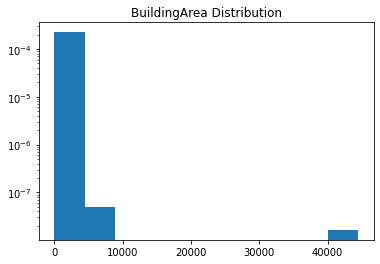

In [15]:
%matplotlib inline
plt.hist(df['BuildingArea'],density=True)
plt.yscale('log')
plt.title('BuildingArea Distribution')

Get median `BuildingArea` for each suburb

In [16]:
suburb_bldg_area_medians = df.groupby('Suburb')['BuildingArea'].median()
# suburb_bldg_area_medians[suburb_bldg_area_medians > 0].isna()
suburb_bldg_area_medians.sort_values()

Suburb
Guys Hill          0.0
Melbourne         65.5
St Kilda          74.0
Glen Huntly       78.0
Southbank         78.5
                  ... 
Wandin North       NaN
Werribee South     NaN
Wildwood           NaN
croydon            NaN
viewbank           NaN
Name: BuildingArea, Length: 351, dtype: float64

Check the size of each suburb with NaN `BuildingArea`

In [17]:
nan_bldg_areas = list(suburb_bldg_area_medians[suburb_bldg_area_medians.isna()].index)
# print(nan_bldg_areas)
df[df['Suburb'].isin(nan_bldg_areas)].groupby('Suburb').size().sort_values(ascending=False)

Suburb
MacLeod           83
Heatherton         5
Rockbank           5
Eumemmerring       3
Tecoma             2
                  ..
Doveton            0
Doreen             0
Donvale            0
Doncaster East     0
Huntingdale        0
Length: 351, dtype: int64

Drop Suburbs with NaN median `BuildingArea` 

In [18]:
df = df[~df['Suburb'].isin(nan_bldg_areas)]
df.shape

(34733, 20)

Replace the rest of 0 and NaN values in `BuildingArea` with their `Suburb` median

In [19]:
df['BuildingArea'] = df.apply(lambda row: suburb_bldg_area_medians[row['Suburb']] if pd.isna(row['BuildingArea']) else row['BuildingArea'], axis=1)
df.isna().sum().sort_values(ascending=False)

YearBuilt        19184
Landsize         11707
Longitude         7876
Latitude          7876
Price             7583
Propertycount        2
Regionname           2
CouncilArea          2
Car                  0
BuildingArea         0
Suburb               0
Address              0
Postcode             0
Distance             0
Date                 0
SellerG              0
Method               0
Type                 0
Rooms                0
Bathroom             0
dtype: int64

In [20]:
df = df[df['Landsize']<10000]

## Handling missing `Landsize` values

Text(0.5, 1.0, 'Landsize Distribution')

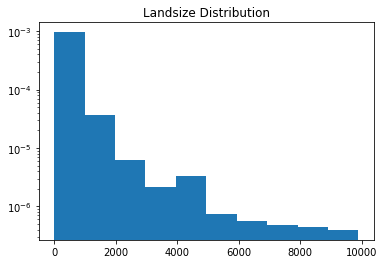

In [21]:
%matplotlib inline
plt.hist(df['Landsize'],density=True)
plt.yscale('log')
plt.title('Landsize Distribution')


In [22]:
df = df[df['Landsize']<60000]

## Handling missing `Price` values
Using median price from suburb

In [23]:
suburb_price_medians = df.groupby('Suburb')['Price'].median()
df['Price'] = df.apply(lambda row: suburb_price_medians[row['Suburb']] if pd.isna(row['Price']) else row['Price'], axis=1)

Remove outliers \
A data point is an outlier if: \
$$data < Q1 - 1.5 \times IQR$$
$$data < Q3 + 1.5 \times IQR$$

In [24]:
from scipy.stats import iqr
def remove_outliers(df,col):
  IQR = iqr(df[col])
  lower_threshold = np.quantile(df[col], 0.25) - 1.5 * IQR
  upper_threshold = np.quantile(df[col], 0.75) + 1.5 * IQR
  return df[(df[col] < lower_threshold) | (df[col] > upper_threshold)]

In [25]:
new_df = remove_outliers(df, 'Landsize')
# new_df.describe()

In [26]:
new_df.shape

(545, 20)

There are 8 regions

In [27]:
new_df = new_df.dropna(subset=['Regionname'])
regions_unique = pd.unique(new_df.Regionname)
print(regions_unique)
print(len(regions_unique))

['Northern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Eastern Metropolitan', 'Eastern Victoria', 'South-Eastern Metropolitan', 'Northern Victoria', 'Western Victoria']
Categories (8, object): ['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan',
                         'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan',
                         'Western Metropolitan', 'Western Victoria']
8


Regional average price

In [28]:
df.groupby('Regionname')['Price'].mean().sort_values(ascending=False)

Regionname
Southern Metropolitan         1.463455e+06
Eastern Metropolitan          1.138532e+06
South-Eastern Metropolitan    9.101755e+05
Northern Metropolitan         9.072590e+05
Western Metropolitan          8.685583e+05
Eastern Victoria              7.035036e+05
Northern Victoria             5.778306e+05
Western Victoria              4.358642e+05
Name: Price, dtype: float64

Methods by region: \
S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

In [29]:
pd.crosstab(df.Regionname, df.Method, margins=True)

Method,PI,PN,S,SA,SN,SP,SS,VB,W,All
Regionname,,,,,,,,,,
Eastern Metropolitan,422,34,1561,26,214,347,7,243,8,2862
Eastern Victoria,18,3,59,3,7,28,0,14,2,134
Northern Metropolitan,791,34,3835,22,208,907,5,435,29,6266
Northern Victoria,8,1,59,1,9,33,1,7,2,121
South-Eastern Metropolitan,171,11,586,12,53,140,3,53,15,1044
Southern Metropolitan,1086,72,4456,63,321,935,8,861,12,7814
Western Metropolitan,575,43,2627,26,133,903,2,310,43,4662
Western Victoria,10,4,50,0,2,12,0,3,0,81
All,3081,202,13233,153,947,3305,26,1926,111,22984


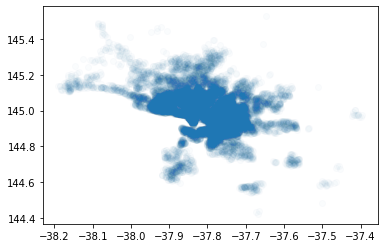

In [30]:
%matplotlib inline
plt.scatter(df['Latitude'], df['Longitude'], alpha=0.02)

In [31]:
df.groupby('Suburb')[['Price','Landsize', 'BuildingArea']].median().sort_values(by='Price').head()

,Price,Landsize,BuildingArea
Suburb,,,
Kurunjang,368500.0,651.0,138.0
Melton,409000.0,590.0,127.0
Bacchus Marsh,412000.0,818.0,129.0
Melton South,416250.0,603.0,115.5
Melton West,438000.0,727.0,148.0


Text(0.5, 1.0, 'Rooms vs Price')

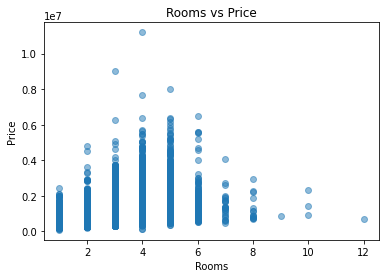

In [32]:
plt.scatter(df['Rooms'], df['Price'], alpha=0.5)
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Rooms vs Price')

Distance: Distance from CBD

Text(0.5, 1.0, 'Distance vs Price')

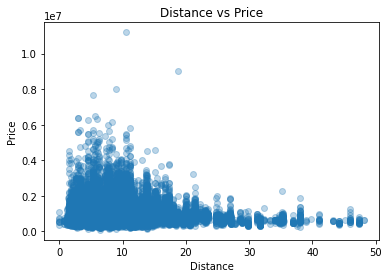

In [33]:
plt.scatter(df['Distance'], df['Price'], alpha=0.3)
plt.xlabel('Distance')
plt.ylabel('Price')
plt.title('Distance vs Price')

Text(0.5, 1.0, 'Bathroom vs Price')

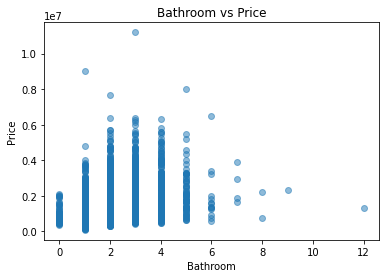

In [34]:
plt.scatter(df['Bathroom'], df['Price'], alpha=0.5)
plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.title('Bathroom vs Price')

Car: Number of carspots

Text(0.5, 1.0, 'Car vs Price')

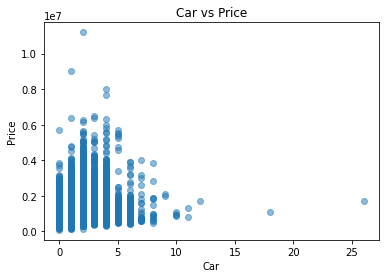

In [35]:
plt.scatter(df['Car'], df['Price'], alpha=0.5)
plt.xlabel('Car')
plt.ylabel('Price')
plt.title('Car vs Price')

Text(0.5, 1.0, 'Landsize vs Price')

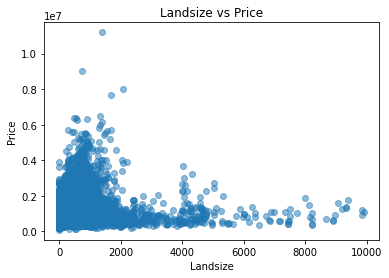

In [36]:
plt.scatter(df['Landsize'], df['Price'], alpha=0.5)
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.title('Landsize vs Price')

Text(0.5, 1.0, 'BuildingArea vs Price')

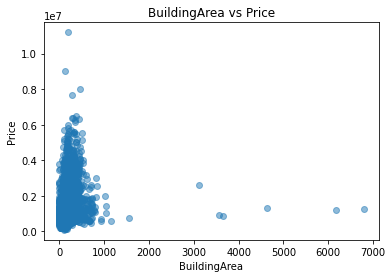

In [37]:
plt.scatter(df['BuildingArea'], df['Price'], alpha=0.5)
plt.xlabel('BuildingArea')
plt.ylabel('Price')
plt.title('BuildingArea vs Price')

Text(0.5, 1.0, 'YearBuilt vs Price')

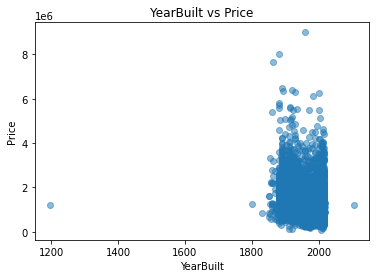

In [38]:
plt.scatter(df['YearBuilt'], df['Price'], alpha=0.5)
plt.xlabel('YearBuilt')
plt.ylabel('Price')
plt.title('YearBuilt vs Price')

Text(0.5, 1.0, 'Propertycount vs Price')

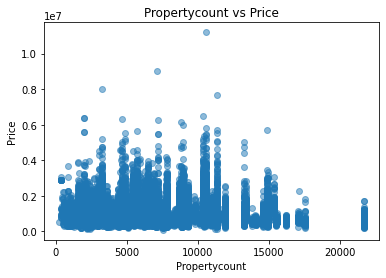

In [39]:
plt.scatter(df['Propertycount'], df['Price'], alpha=0.5)
plt.xlabel('Propertycount')
plt.ylabel('Price')
plt.title('Propertycount vs Price')